In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *
from core.optimizer_evaluator import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Show that convergence rate doesn't depend on basis choice: the distribution of the number of iterations until convergence has one distinctive peak

In [4]:
generator = lambda: generate_positive_definite_quadratic_form(10, 10, random_orthonormal_basis)

computations = [iteration_count_computer(generator, gradient_descent)() for _ in range(100)]
computations

[28,
 29,
 30,
 29,
 28,
 29,
 29,
 30,
 29,
 30,
 30,
 28,
 28,
 28,
 28,
 28,
 28,
 30,
 29,
 29,
 29,
 29,
 29,
 30,
 28,
 29,
 28,
 28,
 28,
 27,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 29,
 30,
 30,
 29,
 29,
 27,
 30,
 30,
 30,
 30,
 29,
 29,
 30,
 29,
 30,
 30,
 30,
 30,
 29,
 27,
 30,
 30,
 29,
 29,
 29,
 28,
 29,
 30,
 28,
 29,
 28,
 29,
 30,
 28,
 27,
 29,
 28,
 30,
 28,
 30,
 29,
 30,
 28,
 30,
 29,
 29,
 30,
 28,
 28,
 28,
 30,
 30,
 29,
 29,
 27,
 29,
 29,
 26,
 30,
 29]

In [5]:
mu = np.mean(computations)
mu

28.92

In [6]:
sigma = np.std(computations)
sigma

0.9019977827023744

In [7]:
sigma / mu

0.03118941157338777

(0.0, 36.0)

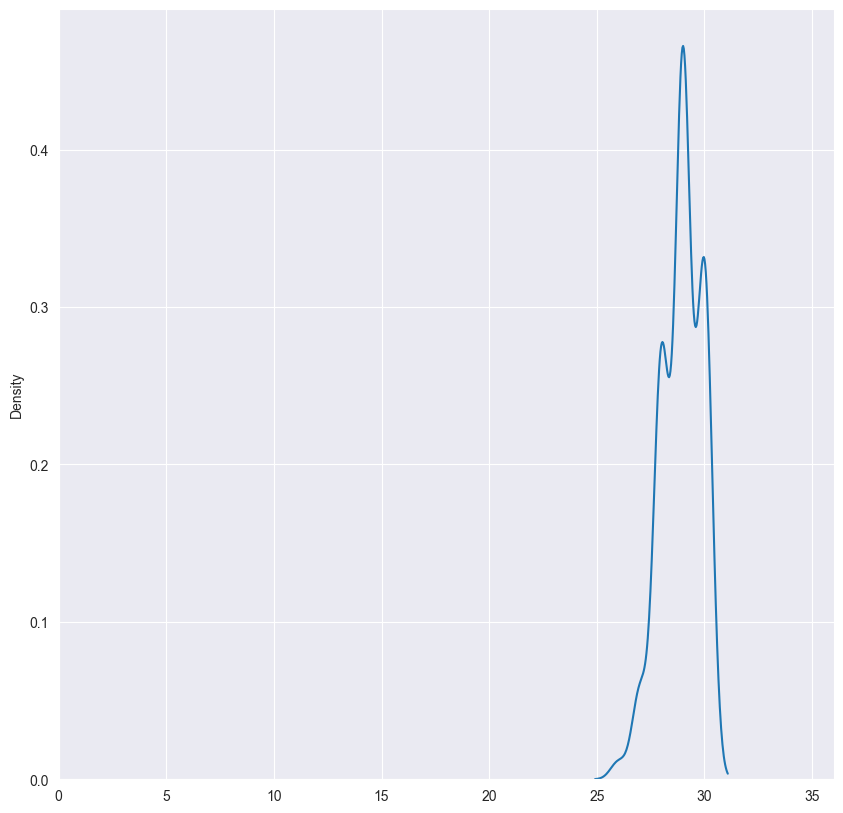

In [8]:
import seaborn as sns

fig, ax = plt.subplots()
sns.kdeplot(computations, ax=ax)
ax.set_xlim(0, max(computations) * 1.2)

# Dependency of iterations until convergence on conditional number and dimension of the problem

As the theorem suggests, the number of iterations until convergence is linear in the condition number of the problem.
Moreover, the number of iterations doesn't depend on the dimension of the problem.

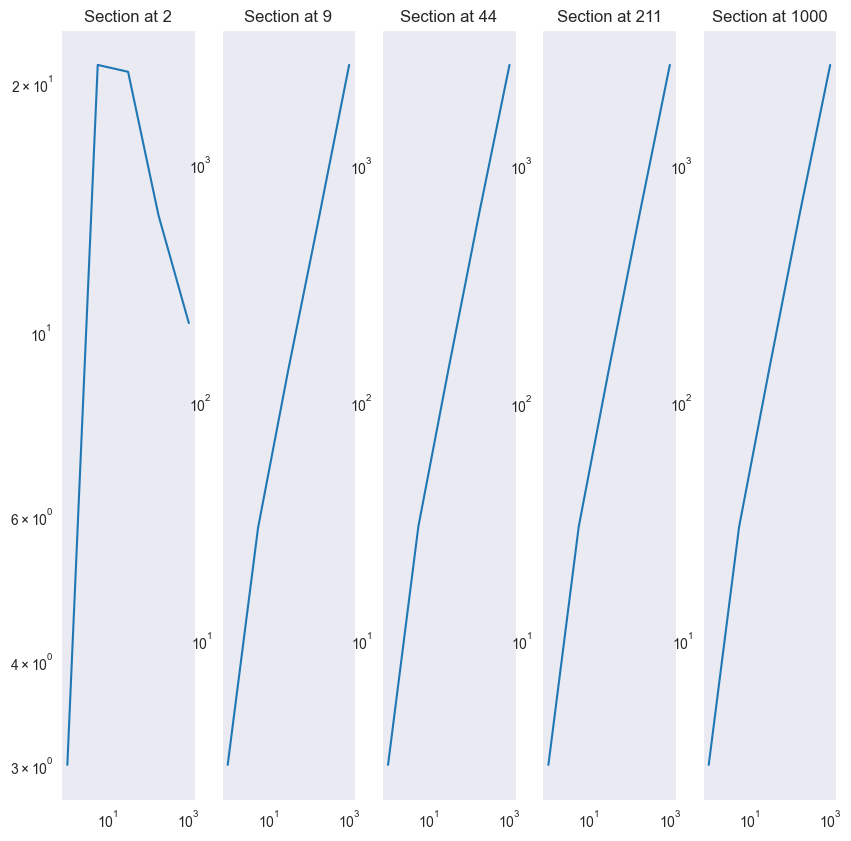

In [31]:
plot_section_graphs(lambda n, k: average_iterations_until_convergence(lambda: generate_positive_definite_quadratic_form(n, k, random_orthonormal_basis), gradient_descent, 15, fibonacci_search(40)), logspace_range(2, 1000, 5, dtype=int), logspace_range(1, 1000, 5))

# Fibonacci search with 10 iterations fails even for canonical basis at $k \geqslant 50$
With `RuntimeWarning: overflow encountered in matmul`

Due to double precision issues, the algorithm fails to converge

In [55]:
# iteration_count_computer(lambda: generate_positive_definite_quadratic_form(1000, 80, canonical_basis), gradient_descent, fibonacci_search(10))()

C:\dev\Education\MethOpt\GradientDescent\core\optimizer_evaluator.py:21: RuntimeWarning: overflow encountered in matmul
  return (x @ self.matrix @ x[:, newaxis])[0]
C:\dev\Education\MethOpt\GradientDescent\core\gradient_descent.py:22: RuntimeWarning: invalid value encountered in multiply
  next_point = last_point - g * linear_search(lambda l: target_function(last_point - g * l),
C:\dev\Education\MethOpt\GradientDescent\core\optimizer_evaluator.py:21: RuntimeWarning: invalid value encountered in matmul
  return (x @ self.matrix @ x[:, newaxis])[0]
C:\dev\Education\MethOpt\GradientDescent\core\optimizer_evaluator.py:24: RuntimeWarning: invalid value encountered in matmul
  return lambda x: (2 * self.matrix @ x[:, newaxis])[:, 0]
C:\dev\Education\MethOpt\GradientDescent\core\gradient_descent.py:22: RuntimeWarning: invalid value encountered in subtract
  next_point = last_point - g * linear_search(lambda l: target_function(last_point - g * l),


KeyboardInterrupt: 

# Whereas binary search and fibonacci with 30 iterations work perfectly even for k = 1000

In [54]:
iteration_count_computer(lambda: generate_positive_definite_quadratic_form(1000, 500, canonical_basis), gradient_descent, fibonacci_search(30))()

602

In [56]:
iteration_count_computer(lambda: generate_positive_definite_quadratic_form(1000, 1000, canonical_basis), gradient_descent, bin_search)()

1309

In [43]:
n_values = logspace_range(10, 100, 10, dtype=int)
k_values = logspace_range(1, 150, 30)

values = [[(n, k) for k in k_values] for n in n_values]

evaluation = [[average_iterations_until_convergence(lambda: generate_positive_definite_quadratic_form(n, k, random_orthonormal_basis), gradient_descent, 15, ) for k in k_values] for n in n_values]

In [44]:
np.array(evaluation)

array([[  3.        ,   6.8       ,   8.53333333,  10.        ,
         12.06666667,  14.26666667,  16.73333333,  19.13333333,
         22.26666667,  25.86666667,  29.06666667,  35.        ,
         40.6       ,  46.8       ,  55.33333333,  64.33333333,
         75.        ,  87.46666667, 101.53333333, 119.06666667,
        138.46666667, 158.46666667, 189.66666667, 217.26666667,
        248.4       , 289.53333333, 339.93333333, 394.86666667,
        453.73333333, 537.33333333],
       [  3.        ,   7.        ,   8.46666667,  10.06666667,
         12.13333333,  14.06666667,  16.66666667,  19.2       ,
         22.46666667,  26.06666667,  30.4       ,  34.26666667,
         39.46666667,  47.13333333,  55.13333333,  65.4       ,
         75.73333333,  88.93333333, 102.        , 117.93333333,
        139.        , 160.73333333, 189.13333333, 219.6       ,
        245.4       , 288.86666667, 338.53333333, 393.33333333,
        460.33333333, 529.26666667],
       [  3.        ,   7.    

In [45]:
from sklearn.linear_model import LinearRegression

x = np.array(values).reshape(-1, 2)
y = np.array(evaluation).reshape(-1, 1)[:, 0]

In [46]:
x

array([[ 10.        ,   1.        ],
       [ 10.        ,   1.18860521],
       [ 10.        ,   1.41278235],
       [ 10.        ,   1.67924046],
       [ 10.        ,   1.99595396],
       [ 10.        ,   2.37240127],
       [ 10.        ,   2.81984851],
       [ 10.        ,   3.35168663],
       [ 10.        ,   3.98383219],
       [ 10.        ,   4.7352037 ],
       [ 10.        ,   5.62828779],
       [ 10.        ,   6.68981219],
       [ 10.        ,   7.95154563],
       [ 10.        ,   9.45124856],
       [ 10.        ,  11.23380329],
       [ 10.        ,  13.35255712],
       [ 10.        ,  15.87091896],
       [ 10.        ,  18.86425696],
       [ 10.        ,  22.42215411],
       [ 10.        ,  26.6510892 ],
       [ 10.        ,  31.67762348],
       [ 10.        ,  37.65218831],
       [ 10.        ,  44.7535872 ],
       [ 10.        ,  53.19434692],
       [ 10.        ,  63.2270779 ],
       [ 10.        ,  75.15203422],
       [ 10.        ,  89.32609942],
 

In [47]:
y

array([  3.        ,   6.8       ,   8.53333333,  10.        ,
        12.06666667,  14.26666667,  16.73333333,  19.13333333,
        22.26666667,  25.86666667,  29.06666667,  35.        ,
        40.6       ,  46.8       ,  55.33333333,  64.33333333,
        75.        ,  87.46666667, 101.53333333, 119.06666667,
       138.46666667, 158.46666667, 189.66666667, 217.26666667,
       248.4       , 289.53333333, 339.93333333, 394.86666667,
       453.73333333, 537.33333333,   3.        ,   7.        ,
         8.46666667,  10.06666667,  12.13333333,  14.06666667,
        16.66666667,  19.2       ,  22.46666667,  26.06666667,
        30.4       ,  34.26666667,  39.46666667,  47.13333333,
        55.13333333,  65.4       ,  75.73333333,  88.93333333,
       102.        , 117.93333333, 139.        , 160.73333333,
       189.13333333, 219.6       , 245.4       , 288.86666667,
       338.53333333, 393.33333333, 460.33333333, 529.26666667,
         3.        ,   7.        ,   8.6       ,  10.06

In [48]:
model = LinearRegression().fit(x, y)

In [49]:
print(f"R^2: {model.score(x, y)}")

R^2: 0.9961194694942691


In [50]:
model.coef_

array([0.02098247, 3.64203576])

In [51]:
model.intercept_

11.76540676227873

In [52]:
print(f"{model.coef_[0]} ≈ 0")

0.020982465577030398 ≈ 0


# Теоретическое обоснование линейности

Из построения эксперимента,

\begin{gather}
\Delta_0 = || f(x_0) || ≈ 1 \\
\Delta_n = || f(x_n) || ≈ \varepsilon
\end{gather}

Из теоремы 3.4,

\begin{gather}
\Delta_n = r^2 \Delta_{n - 1} = \ldots = (r^2)^n \Delta_{0} \\
\Rightarrow n = \log_{r^2} \frac{1}{\varepsilon} = \frac{\log \varepsilon}{2} \frac{1}{-\log(r)} = \begin{bmatrix}r = \frac{\lambda_n - \lambda_1}{\lambda_n + \lambda_1} = \frac{\kappa - 1}{\kappa + 1} \end{bmatrix} = \frac{\log \varepsilon}{2} \frac{1}{\log(\kappa + 1) - \log(\kappa - 1)} \underset{\text{taylor}}{\propto} c \cdot \kappa
\end{gather}


[Cсылка на Вольфрама Тейлора](https://www.wolframalpha.com/input?i2d=true&i=series+Divide%5B1%2Clog%5C%2840%29k%2B1%5C%2841%29-log%5C%2840%29k-1%5C%2841%29%5D+at+k+%E2%86%92%C2%A0%2B%E2%88%9E)